# **Algorithm Design, Implementation, and Performance Analysis**
## **1. Algorithm Design and Implementation**
### **1.1 Matrix Product**
The entry of the resulting matrix `C` at row `i` and column `j`, denoted as $c_{ij}$, is computed using the following summation:  
$$
c_{ij} = \sum_{k=1}^{n} a_{ik} \cdot b_{kj}
$$     
This means:
- Fix a row `i` from matrix `A`
- Fix a column `j` from matrix `B`
- Multiply each corresponding element $a_{ik}$ (from row `i` of `A`) with $b_{kj}$ (from column `j` of `B`)
- Sum all these products to get the value $c_{ij}$
#### **1.1.1 Algorithm Design**

In [33]:
import numpy as np

def matrix_product(A, B, C, n):
	for i in range(n):  # Iterate over each row of A
		for j in range(n):  # Iterate over each column of B
			# Compute the dot product of the i-th row of A and the j-th column of B
			C[i, j] = np.dot(A[i], B[:, j])

#### **1.1.2 Functionality Demonstration with Random Matrices**
We will demonstrate the functionality of the `matrix_product` algorithm by applying it to randomly generated matrices. The matrices `A` and `B` are displayed before multiplication, and the resulting matrix `C` is shown afterward.

In [34]:
import random

n = 5

A = np.array([[random.randint(-10, 10) for _ in range(n)] for _ in range(n)])
B = np.array([[random.randint(-10, 10) for _ in range(n)] for _ in range(n)])
C = np.array([[0 for _ in range(n)] for _ in range(n)])
matrix_product(A, B, C, n)
print(f'Matrix A:\n{A}\n')
print(f'Matrix B:\n{B}\n')
print(f'AxB:\n{C}\n')

Matrix A:
[[  8   3  -6  -7  10]
 [ -5  -3  -1 -10   4]
 [ -6  -7   7   0   2]
 [ -7   6   4 -10  -9]
 [ 10  -9   3   7   7]]

Matrix B:
[[-9  3 -4 -4 -2]
 [-3 -9 -5 -4  3]
 [-8  8 -5  5 -9]
 [-2 -6  7 -6  2]
 [-7  6  6  5 -1]]

AxB:
[[ -89   51   -6   18   23]
 [  54   88   -6  107  -14]
 [   5  113   36   97  -74]
 [  96  -37 -146   39  -15]
 [-150  135   81    4  -67]]



#### **1.1.3 Validation of Correctness**
We will validate the correctness of `matrix_product` by comparing its results with the `np.matmul` function, which is a well-established matrix multiplication implementation in `NumPy`.

In [35]:
import random

m = 100  # Number of different matrix sizes to test
test = True  # Flag to track if all tests pass

for n in range(1, m+1):  # Test for matrix sizes from 1x1 up to mxm
    # Generate two random n x n matrices with integer values between -10 and 10
    A = np.array([[random.randint(-10, 10) for _ in range(n)] for _ in range(n)])
    B = np.array([[random.randint(-10, 10) for _ in range(n)] for _ in range(n)])
    # Initialize an n x n zero matrix for the result
    C = np.array([[0 for _ in range(n)] for _ in range(n)])
    # Compute the product using the custom matrix_product function
    matrix_product(A, B, C, n)
    # Compute the product using NumPy's built-in matmul for validation
    C2 = np.matmul(A, B)
    # Compare the results; if they differ, print a message and stop testing
    if not np.array_equal(C, C2):
        print(f'matrix_product got a different result')
        test = False
        break

if test:
    print('matrix_product works perfectly!!!')

matrix_product works perfectly!!!


### **1.2 Recursive Matrix Multiplication**
The recursive approach to matrix multiplication divides each input matrix into four equally sized submatrices (quadrants). It then recursively computes the products of these submatrices and combines the results to form the final product matrix. This method continues subdividing the matrices until reaching the base case of single-element matrices, which are multiplied directly. By breaking down the problem into smaller subproblems and combining their solutions, the recursive strategy efficiently constructs the full matrix product.
#### **1.2.1 Algorithm Design**

In [36]:
import numpy as np

def recursive_matrix_product(A, B, C, n):
	# Base case: if the matrix is 1x1, multiply the single elements
	if n == 1:
		C[0, 0] = A[0, 0] * B[0, 0]
		return

	mid = n // 2  # Find the midpoint to partition the matrices

	# Partition matrices A, B, and C into four quadrants each
	A11, A12 = A[:mid, :mid], A[:mid, mid:]
	A21, A22 = A[mid:, :mid], A[mid:, mid:]
	B11, B12 = B[:mid, :mid], B[:mid, mid:]
	B21, B22 = B[mid:, :mid], B[mid:, mid:]
	C11, C12 = C[:mid, :mid], C[:mid, mid:]
	C21, C22 = C[mid:, :mid], C[mid:, mid:]

	# Temporary matrices to store intermediate results for addition
	S1 = np.zeros((mid, mid), dtype=A.dtype)
	S2 = np.zeros((mid, mid), dtype=A.dtype)

	# Compute C11 = A11*B11 + A12*B21
	recursive_matrix_product(A11, B11, C11, mid)   # C11 += A11 * B11
	recursive_matrix_product(A12, B21, S1, mid)    # S1 = A12 * B21
	C11 += S1                           # Add S1 to C11

	# Compute C12 = A11*B12 + A12*B22
	recursive_matrix_product(A11, B12, C12, mid)   # C12 += A11 * B12
	recursive_matrix_product(A12, B22, S2, mid)    # S2 = A12 * B22
	C12 += S2                           # Add S2 to C12

	# Prepare S1 and S2 for reuse
	S1.fill(0)
	S2.fill(0)

	# Compute C21 = A21*B11 + A22*B21
	recursive_matrix_product(A21, B11, C21, mid)   # C21 += A21 * B11
	recursive_matrix_product(A22, B21, S1, mid)    # S1 = A22 * B21
	C21 += S1                           # Add S1 to C21

	# Compute C22 = A21*B12 + A22*B22
	recursive_matrix_product(A21, B12, C22, mid)   # C22 += A21 * B12
	recursive_matrix_product(A22, B22, S2, mid)    # S2 = A22 * B22
	C22 += S2                           # Add S2 to C22

#### **1.2.2 Functionality Demonstration with Random Matrices**
We will demonstrate the functionality of the `recursive_matrix_product` algorithm by applying it to randomly generated matrices. The matrices `A` and `B` are displayed before multiplication, and the resulting matrix `C` is shown afterward.

In [37]:
import random

n = 4

A = np.array([[random.randint(-10, 10) for _ in range(n)] for _ in range(n)])
B = np.array([[random.randint(-10, 10) for _ in range(n)] for _ in range(n)])
C = np.array([[0 for _ in range(n)] for _ in range(n)])
recursive_matrix_product(A, B, C, n)
print(f'Matrix A:\n{A}\n')
print(f'Matrix B:\n{B}\n')
print(f'AxB:\n{C}\n')

Matrix A:
[[ -5   4   4   4]
 [ -4   4   5   9]
 [ -5  -5 -10   5]
 [ -6  -2   6  -3]]

Matrix B:
[[ 2  0  9 -7]
 [ 7 -1  9 -7]
 [ 6  2  8  5]
 [ 2  1  8 -2]]

AxB:
[[  50    8   55   19]
 [  68   15  112    7]
 [ -95  -10 -130   10]
 [   4   11  -48   92]]



#### **1.2.3 Validation of Correctness**
We will validate the correctness of `recursive_matrix_product` by comparing its results with the `np.matmul` function, which is a well-established matrix multiplication implementation in `NumPy`.

In [38]:
import random

n_list = [1, 2, 4, 8, 16, 32, 64]  # List of matrix sizes to test (powers of 2)
m = 10  # Number of tests to run for each matrix size
test = True  # Flag to track if all tests pass

for n in n_list:  # Iterate over each matrix size in the list
	for _ in range(m):  # Repeat the test m times for each size
		# Generate two random n x n matrices with integer values between -10 and 10
		A = np.array([[random.randint(-10, 10) for _ in range(n)] for _ in range(n)])
		B = np.array([[random.randint(-10, 10) for _ in range(n)] for _ in range(n)])
		# Initialize an n x n zero matrix for the result
		C = np.array([[0 for _ in range(n)] for _ in range(n)])
		# Compute the product using the custom recursive_matrix_product function
		recursive_matrix_product(A, B, C, n)
		# Compute the product using NumPy's built-in matmul for validation
		C2 = np.matmul(A, B)
		# Compare the results; if they differ, print a message and stop testing
		if not np.array_equal(C, C2):
			print(f'recursive_matrix_product got a different result')
			test = False
			break

if test:
	print('recursive_matrix_product works perfectly!!!')

recursive_matrix_product works perfectly!!!


### **1.3 Strassen's Method**
Strassen's methodology for matrix multiplication is based on a divide-and-conquer approach that reduces the number of necessary multiplications. Instead of performing the standard eight multiplications required for two-by-two block matrices, Strassen's method cleverly computes seven specific products of matrix sub-blocks and combines them using addition and subtraction. This reduction in multiplications leads to a lower overall computational complexity compared to the conventional algorithm, making Strassen's approach more efficient for large matrices.
#### **1.3.1 Algorithm Design**

In [1]:
import numpy as np

def strassen(A, B, C, n):
	# Base case: use standard multiplication for 1x1 matrices
	if n == 1:
		C[0, 0] = A[0, 0] * B[0, 0]
		return

	mid = n // 2  # Find the midpoint to partition the matrices

	# Partition matrices A, B, and C into four quadrants each
	A11, A12 = A[:mid, :mid], A[:mid, mid:]
	A21, A22 = A[mid:, :mid], A[mid:, mid:]
	B11, B12 = B[:mid, :mid], B[:mid, mid:]
	B21, B22 = B[mid:, :mid], B[mid:, mid:]
	C11, C12 = C[:mid, :mid], C[:mid, mid:]
	C21, C22 = C[mid:, :mid], C[mid:, mid:]

	# Allocate temporary matrices for Strassen's 7 products
	M1 = np.zeros((mid, mid), dtype=A.dtype)
	M2 = np.zeros((mid, mid), dtype=A.dtype)
	M3 = np.zeros((mid, mid), dtype=A.dtype)
	M4 = np.zeros((mid, mid), dtype=A.dtype)
	M5 = np.zeros((mid, mid), dtype=A.dtype)
	M6 = np.zeros((mid, mid), dtype=A.dtype)
	M7 = np.zeros((mid, mid), dtype=A.dtype)

	# Compute the 7 products using Strassen's formulas
	strassen(A11 + A22, B11 + B22, M1, mid)      # M1 = (A11 + A22) * (B11 + B22)
	strassen(A21 + A22, B11, M2, mid)            # M2 = (A21 + A22) * B11
	strassen(A11, B12 - B22, M3, mid)            # M3 = A11 * (B12 - B22)
	strassen(A22, B21 - B11, M4, mid)            # M4 = A22 * (B21 - B11)
	strassen(A11 + A12, B22, M5, mid)            # M5 = (A11 + A12) * B22
	strassen(A21 - A11, B11 + B12, M6, mid)      # M6 = (A21 - A11) * (B11 + B12)
	strassen(A12 - A22, B21 + B22, M7, mid)      # M7 = (A12 - A22) * (B21 + B22)

	# Combine the results into C using Strassen's recombination formulas
	C11[:, :] = M1 + M4 - M5 + M7   # C11 = M1 + M4 - M5 + M7
	C12[:, :] = M3 + M5             # C12 = M3 + M5
	C21[:, :] = M2 + M4             # C21 = M2 + M4
	C22[:, :] = M1 - M2 + M3 + M6   # C22 = M1 - M2 + M3 + M6

#### **1.3.2 Functionality Demonstration with Random Matrices**
We will demonstrate the functionality of the `strassen` algorithm by applying it to randomly generated matrices. The matrices `A` and `B` are displayed before multiplication, and the resulting matrix `C` is shown afterward.

In [40]:
import random

n = 4

A = np.array([[random.randint(-10, 10) for _ in range(n)] for _ in range(n)])
B = np.array([[random.randint(-10, 10) for _ in range(n)] for _ in range(n)])
C = np.array([[0 for _ in range(n)] for _ in range(n)])
strassen(A, B, C, n)
print(f'Matrix A:\n{A}\n')
print(f'Matrix B:\n{B}\n')
print(f'AxB:\n{C}\n')

Matrix A:
[[  6   9 -10   1]
 [  3  -9   2   8]
 [ -1   2  -6   1]
 [  7   1  -2   3]]

Matrix B:
[[ -2  -2  -6   8]
 [ -7   7  -6  -1]
 [ -9   3   2  -4]
 [-10   6  -4  -6]]

AxB:
[[   5   27 -114   73]
 [ -41  -15    8  -23]
 [  32    4  -22    8]
 [ -33    5  -64   45]]



#### **1.3.3 Validation of Correctness**
We will validate the correctness of `strassen` by comparing its results with the `np.matmul` function, which is a well-established matrix multiplication implementation in `NumPy`.

In [41]:
import random

n_list = [1, 2, 4, 8, 16, 32, 64]  # List of matrix sizes to test (powers of 2)
m = 10  # Number of tests to run for each matrix size
test = True  # Flag to track if all tests pass

for n in n_list:  # Iterate over each matrix size in the list
	for _ in range(m):  # Repeat the test m times for each size
		# Generate two random n x n matrices with integer values between -10 and 10
		A = np.array([[random.randint(-10, 10) for _ in range(n)] for _ in range(n)])
		B = np.array([[random.randint(-10, 10) for _ in range(n)] for _ in range(n)])
		# Initialize an n x n zero matrix for the result
		C = np.array([[0 for _ in range(n)] for _ in range(n)])
		# Compute the product using the custom strassen function
		strassen(A, B, C, n)
		# Compute the product using NumPy's built-in matmul for validation
		C2 = np.matmul(A, B)
		# Compare the results; if they differ, print a message and stop testing
		if not np.array_equal(C, C2):
			print(f'strassen got a different result')
			test = False
			break

if test:
	print('strassen works perfectly!!!')

strassen works perfectly!!!


## **2. Experiment Block: Performance Comparison**
### **2.1 Importing Libraries and Setting Up Paths**

In [42]:
import random
import time
import matplotlib.pyplot as plt
import os
import sys

sys.path.append(os.path.abspath("../img"))

### **2.2 Utility Functions for Performance Measurement and Visualization**

In [43]:
# Function that computes the execution time
def execution_time(fun, *args):
	# Record the start time before the function call
	start = time.time()
	
	# Call the function with the provided arguments
	fun(*args)
	
	# Record the end time after the function call
	end = time.time()
	
	# Return the difference between end and start times (execution duration)
	return end - start


# Function that compares execution time
def comparison_machine(sizes, reps, algorithm):
	total_time = [[] for _ in algorithm]  # Initialize a list to store times for each algorithm

	for n in sizes:  # Iterate over each matrix size
		cumulative_time = [0 for _ in algorithm]  # Track cumulative time for each algorithm

		for _ in range(reps):  # Repeat the test 'reps' times for averaging
			# Generate two random n x n matrices with integer values between -10 and 10
			A = np.array([[random.randint(-10, 10) for _ in range(n)] for _ in range(n)])
			B = np.array([[random.randint(-10, 10) for _ in range(n)] for _ in range(n)])

			for i, algo in enumerate(algorithm):  # Test each algorithm
				C = np.array([[0 for _ in range(n)] for _ in range(n)])  # Initialize result matrix
				# Measure and accumulate execution time for the algorithm
				cumulative_time[i] += execution_time(algo, A, B, C, n)

		# Compute and store the average execution time for each algorithm at this size
		for i, t in enumerate(cumulative_time):
			total_time[i].append(t / reps)

	return total_time  # Return the list of average times for each algorithm


# Function that plots the results
def comparison_graph(sizes, t, algorithm):
	# Create the plot
	for i, algo in enumerate(algorithm):
		# Plot the execution times for each algorithm
		plt.plot(sizes, t[i], label=algo.__name__)
	
	# Plot features
	plt.title(f'Comparison plot') # Title
	plt.xlabel("Matrix size (n x n)") # x-axis label
	plt.ylabel("Average time (s)") # y-axis label
	plt.legend(loc='upper left') # show legend

	# Relative path to the 'img' folder from the notebook location
	img_path = os.path.join("..", "img")
	
	# Ensure the 'img' folder exists; create it if it doesn't
	os.makedirs(img_path, exist_ok=True)

	# Save the graph to the 'img' folder with a filename based on the scenario name
	filename = os.path.join(img_path, "comparison.png")
	plt.savefig(filename, bbox_inches="tight")  # Save the plot with tight bounding box
	print(f"Graph saved to: {filename}")  # Print the location of the saved graph
	
	# Display the plot
	plt.show()


# Function that calls all the machinery
def machine_call(sizes, reps, algorithm):
	# Call the comparison_machine function to compute execution times
	t = comparison_machine(sizes, reps, algorithm)
	
	# Call the comparison_graph function to plot the results
	comparison_graph(sizes, t, algorithm)

### **2.3 Performance Comparison of Matrix Multiplication Algorithms**
This subsection sets up and runs a performance comparison of three different matrix multiplication algorithms: the standard iterative method (`matrix_product`), the recursive method (`recursive_matrix_product`), and Strassen's algorithm (`strassen`). It measures the average execution time of each algorithm for square matrices of increasing sizes (from 1x1 up to 128x128), repeating each test multiple times for accuracy. The results are then visualized in a plot, allowing for a clear comparison of the computational efficiency of each algorithm as matrix size increases.

Graph saved to: ..\img\comparison.png


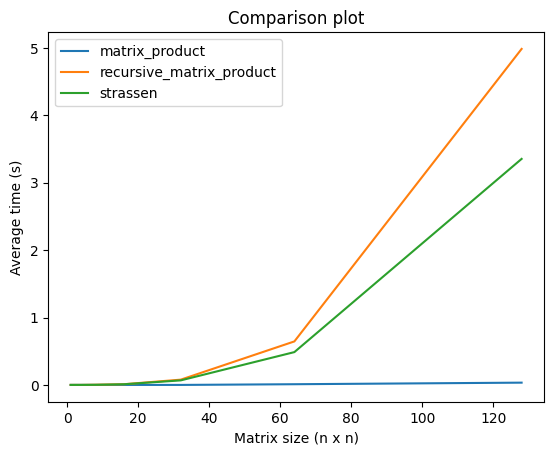

In [45]:
samples = 8  # Number of different matrix sizes to test (from 2^0 to 2^7)
sizes = [2 ** i for i in range(samples)]  # List of matrix sizes: [1, 2, 4, 8, 16, 32, 64, 128]
reps = 10  # Number of repetitions for each matrix size to average the timing
algorithm = [matrix_product, recursive_matrix_product, strassen]  # List of algorithms to compare
machine_call(sizes, reps, algorithm)  # Run the performance comparison and plot the results

The plot shows that matrix_product is the fastest algorithm for the tested matrix sizes. Contrary to theoretical expectations, the advantages of Strassen's method are not evident at these scales. Significantly larger matrices are needed to observe the potential efficiency gains of Strassen's algorithm.

# **Conclusion**

In this notebook, we explored and implemented three matrix multiplication algorithms: the standard iterative method, the recursive approach, and Strassen's algorithm. Through both correctness validation and experimental performance analysis, we observed that all three methods produce accurate results for square matrices of various sizes.

The performance comparison revealed that the standard iterative method (`matrix_product`) consistently outperforms the recursive and Strassen's algorithms for the tested matrix sizes (up to 128×128). Although Strassen's algorithm is theoretically more efficient for very large matrices, its practical advantages are not apparent at these scales due to overhead from recursion and additional matrix operations. To observe the theoretical benefits of Strassen's method, experiments with significantly larger matrices would be required.

Overall, for small to moderately sized matrices, the standard iterative approach remains the most practical and efficient choice. Strassen's algorithm may become advantageous only for much larger matrices, where its reduced asymptotic complexity can outweigh its overhead.